# Problem Statement

It is required to do a predictive analysis using startup's financial information to predict their current financial state

In [1]:
#important libraries

import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
from datetime import date

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

In [2]:
#reading the raw data
comp=pd.read_csv('companies.csv')

In [3]:
#first look
comp.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [5]:
comp.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [6]:
#checking missing values 

print("missing values numbers","\n",comp.isnull().sum().sort_values(ascending=False),"\n","missing values distribution","\n",comp.isnull().mean().sort_values(ascending=False))

missing values numbers 
 parent_id              196553
ROI                    195827
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
closed_at              193933
short_description      189422
funding_total_usd      168679
last_funding_at        165046
first_funding_at       165046
funding_rounds         164846
state_code             145650
twitter_username       115962
tag_list               115101
lat                    112701
lng                    112701
city                   112663
country_code           108563
founded_at             105326
first_milestone_at     104854
milestones             104854
last_milestone_at      104854
description            104505
logo_height             86443
logo_width              86443
logo_url                86443
category_code           73367
homepage_url            70008
domain                  70008
overview                69582
relationships           66886
created_by     

In [7]:
#checking duplicates
comp.duplicated().sum()

0

In [8]:
#for indexing
comp.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## Removing irrelevent columns

looking at the raw data and try to understand it, it was noticed that many columns are irrelevent to the stude of predictive analysis of Acquisition state, such as: 
- id, Unnamed: 0.1, entity_type, name, normalized_name, permalink ,parent_id, domain, homepage_url, twitter_username, logo_url, logo_width, logo_height, short_description, description, overview , tag_list, created_by,,state_code, city, created_at, updated_at .

So these columns will be dropped.

also there are many columns that have large number of null values(more that 98%) that cannot be estimated or found and if we used a Missing Data Imputation technique it will decrease the accuracy of our analysis so these columns will be droped as well, these columns are:
-  first_investment_at, last_investment_at, investment_rounds, invested_companies, ROI
                 

note: the column closed_at has more than 98% null values but we need it to calculate active days of closed companies so we can't remove it yet.

In [9]:
#removing_columns
comp=comp.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
   'created_at', 'updated_at','region','city','state_code','domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
    'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
    'invested_companies','first_investment_at', 'last_investment_at','ROI','investment_rounds','lat','lng'], axis=1)


## Gaining info. from visualization

<AxesSubplot:>

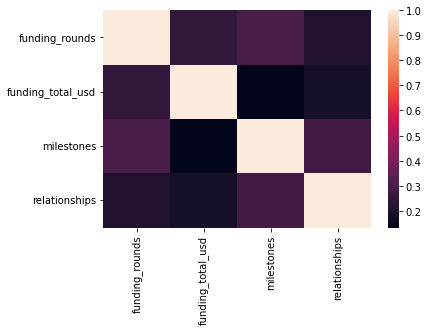

In [10]:
#finging Correlation
sns.heatmap(comp.corr())

<AxesSubplot:xlabel='status', ylabel='count'>

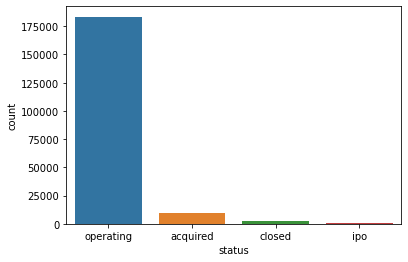

In [11]:
#univirate analysis for some categorical columns
sns.countplot(data=comp, x='status')

* this show how much the data is biased

<AxesSubplot:xlabel='count', ylabel='category_code'>

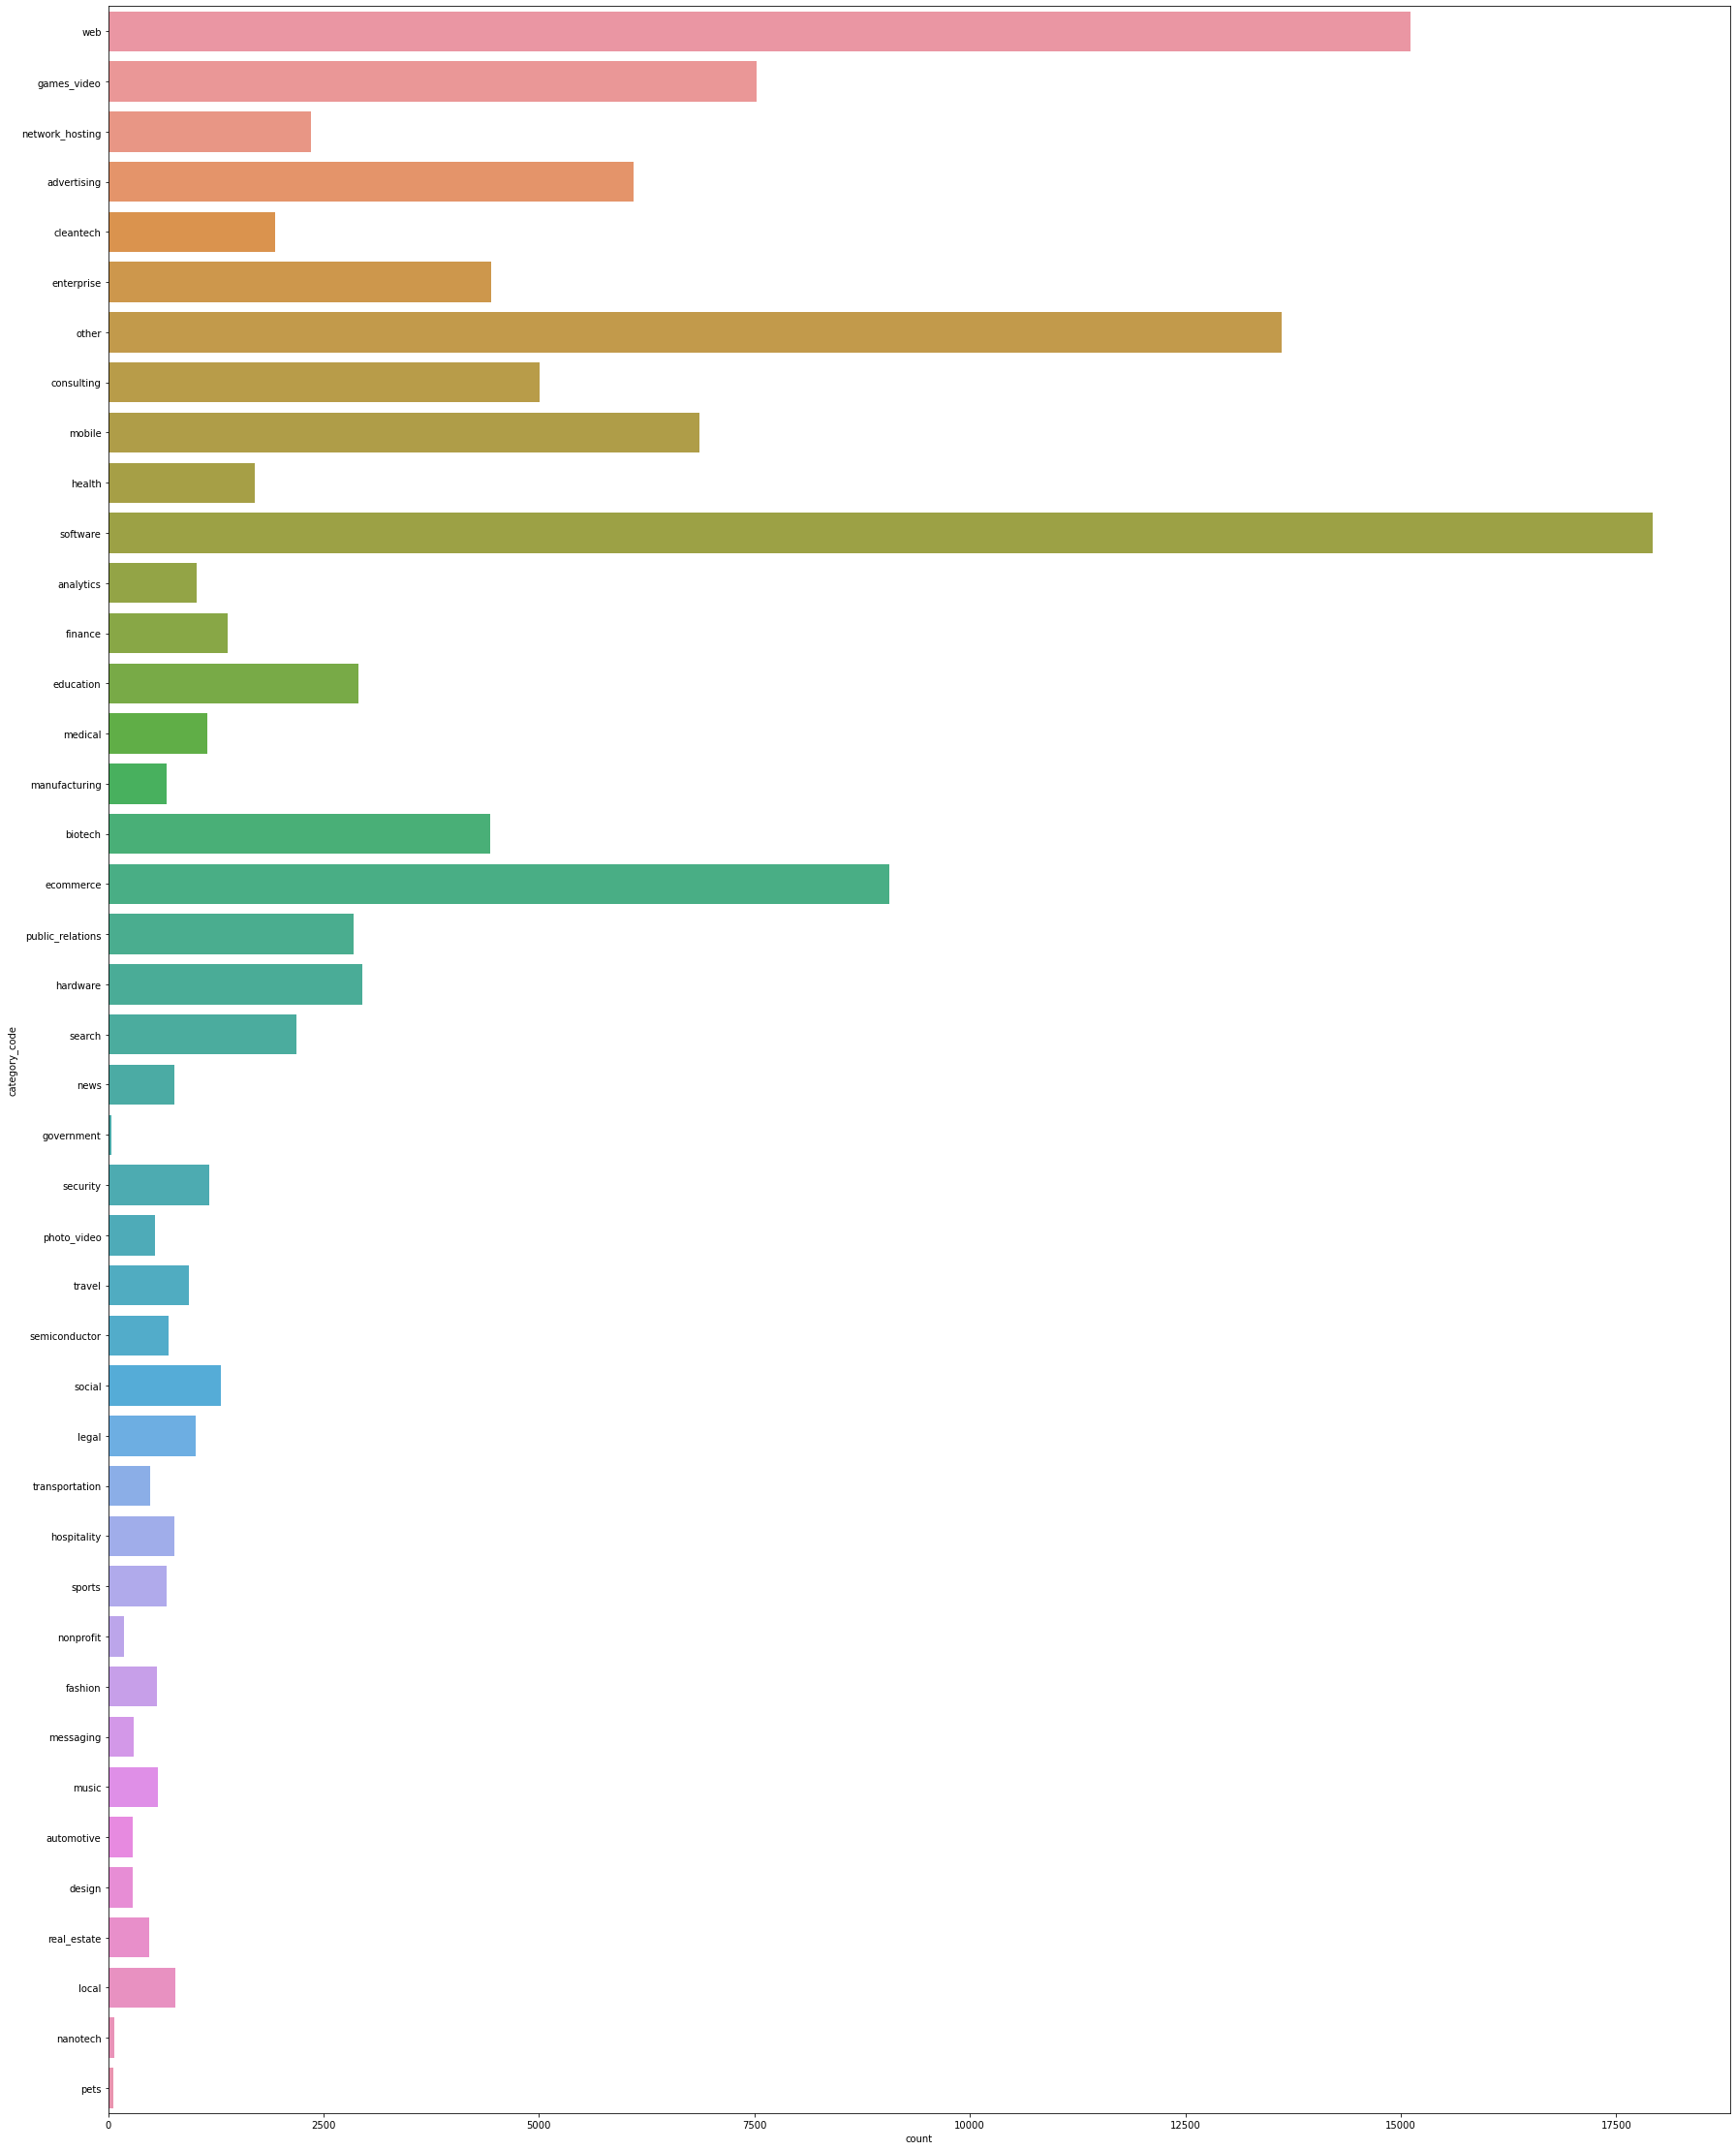

In [12]:
plt.figure(figsize=(30,40))
sns.countplot(data=comp, y='category_code')

## Checking and handeling outliers
 

Text(0.5, 1.0, 'Total Funding in USD')

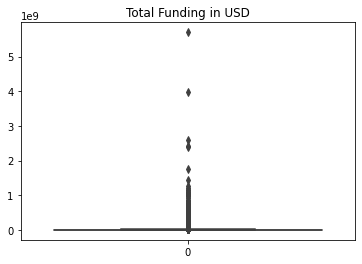

In [13]:
#plt.figure(figsize=(10,10))
sns.boxplot(data=comp['funding_total_usd'],orient="v")
plt.title("Total Funding in USD")

Text(0.5, 1.0, 'Total Funding rounds')

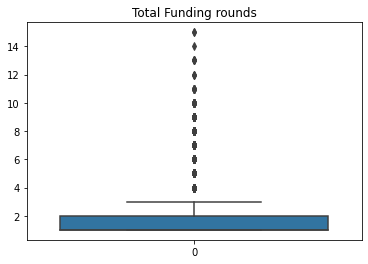

In [14]:
sns.boxplot(data=comp['funding_rounds'],orient="v")
plt.title("Total Funding rounds")

- Clearly there are a lot of outliers in total funding and funding rounds values.

In [15]:
#removing outliers
# Calculate the IQR for the data
q1 = comp['funding_total_usd'].quantile(0.25)
q3 = comp['funding_total_usd'].quantile(0.75)
iqr = q3 - q1
                        
# Define the upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
                        
# Remove any values that fall outside the bounds
comp=comp.loc[(comp['funding_total_usd'] >= lower_bound) & (comp['funding_total_usd'] <= upper_bound), :]
print(lower_bound,upper_bound)

#q11, q33 = np.percentile(comp['funding_rounds'], [25, 75])
q11 = comp['funding_rounds'].quantile(0.25)
q33 = comp['funding_rounds'].quantile(0.75)
iqrr = q33 - q11
                        
# Define the upper and lower bounds for outliers
lower_bound_r = q11 - 1.5 * iqrr
upper_bound_r = q33 + 1.5 * iqrr
                        
# Remove any values that fall outside the bounds
comp=comp.loc[(comp['funding_rounds'] >= lower_bound_r) & (comp['funding_rounds'] <= upper_bound_r), :]
print(lower_bound_r,upper_bound_r)

-15250000.0 26750000.0
-0.5 3.5


<AxesSubplot:ylabel='funding_total_usd'>

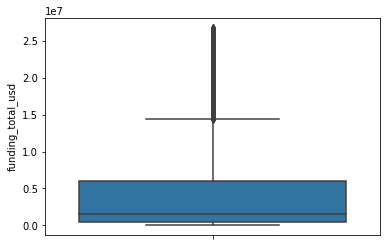

In [16]:
#checking
sns.boxplot(data=comp,y='funding_total_usd')

In [17]:
#checking changes
comp.describe()

,funding_rounds,funding_total_usd,milestones,relationships
count,23333.000000,2.333300e+04,12006.000000,18383.000000
mean,1.390048,4.289398e+06,1.541896,4.360115
std,0.636790,5.786762e+06,0.784291,12.789713
min,1.000000,2.910000e+02,1.000000,1.000000
25%,1.000000,3.973900e+05,1.000000,2.000000
50%,1.000000,1.600000e+06,1.000000,3.000000
75%,2.000000,6.000000e+06,2.000000,5.000000
max,3.000000,2.675000e+07,7.000000,1046.000000


## Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.

In [18]:
#Removing Null values in the following columns
comp=comp.loc[comp['status'].notnull(),:]
comp=comp.loc[comp['country_code'].notnull(),:]
comp=comp.loc[comp['category_code'].notnull(),:]
comp=comp.loc[comp['founded_at'].notnull(),:]




In [19]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 13 to 196552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       16715 non-null  object 
 1   status              16715 non-null  object 
 2   founded_at          16715 non-null  object 
 3   closed_at           1064 non-null   object 
 4   country_code        16715 non-null  object 
 5   first_funding_at    16664 non-null  object 
 6   last_funding_at     16664 non-null  object 
 7   funding_rounds      16715 non-null  float64
 8   funding_total_usd   16715 non-null  float64
 9   first_milestone_at  9933 non-null   object 
 10  last_milestone_at   9933 non-null   object 
 11  milestones          9933 non-null   float64
 12  relationships       14296 non-null  float64
dtypes: float64(4), object(9)
memory usage: 1.8+ MB


## Date Transformation

In [20]:
#parsing dates
dates=['founded_at','first_funding_at','last_funding_at','closed_at','first_milestone_at','last_milestone_at']
for i in dates :
    comp[i]=pd.to_datetime(comp[i], format="%Y/%m/%d")
    



In [21]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 13 to 196552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   category_code       16715 non-null  object        
 1   status              16715 non-null  object        
 2   founded_at          16715 non-null  datetime64[ns]
 3   closed_at           1064 non-null   datetime64[ns]
 4   country_code        16715 non-null  object        
 5   first_funding_at    16664 non-null  datetime64[ns]
 6   last_funding_at     16664 non-null  datetime64[ns]
 7   funding_rounds      16715 non-null  float64       
 8   funding_total_usd   16715 non-null  float64       
 9   first_milestone_at  9933 non-null   datetime64[ns]
 10  last_milestone_at   9933 non-null   datetime64[ns]
 11  milestones          9933 non-null   float64       
 12  relationships       14296 non-null  float64       
dtypes: datetime64[ns](6), float64(4), object(3)


## Encoding category_code and country_code

In [22]:
#checking the values in category_code column
categories=comp['category_code'].value_counts()
# select the top 15 values
categories_selected= categories.head(15).index.tolist()
# replace all values that are not in the top 15 with "other"
comp['category_code']=comp['category_code'].replace({value: 'other' for value in categories.index 
                                                     if value not in categories_selected})


<AxesSubplot:xlabel='category_code', ylabel='count'>

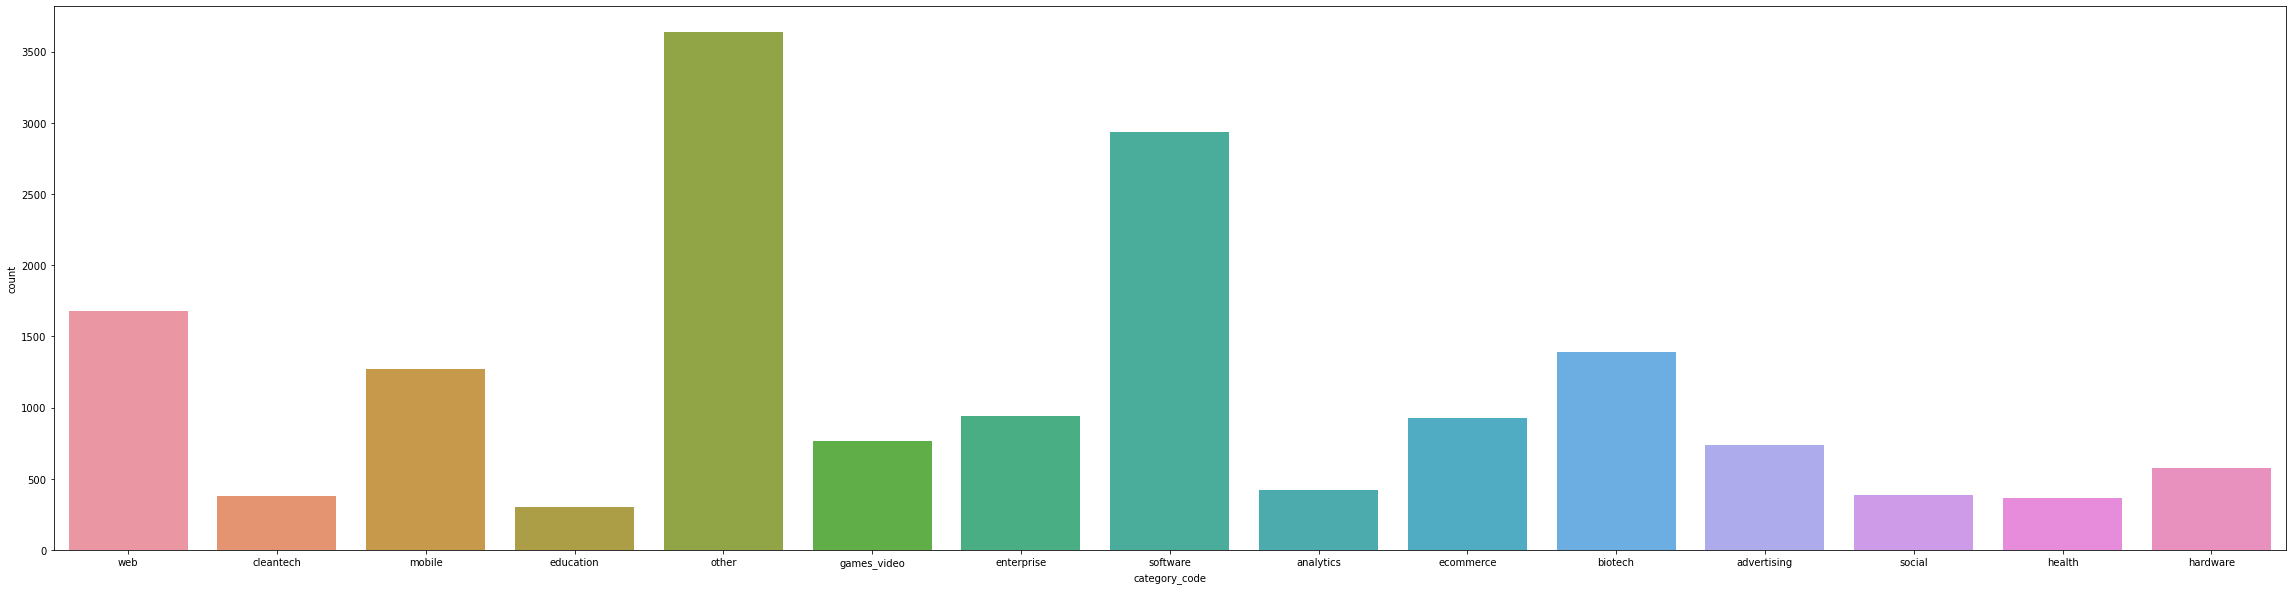

In [23]:
#checking changes using a plot:
plt.figure(figsize=(40,10))
sns.countplot(data=comp, x='category_code')

In [24]:
#doing the same thing for country column by we select only 10 countries
#checking the values in country_code column
countries=comp['country_code'].value_counts()
# select the top 10 values
countries_selected= countries.head(10).index.tolist()
# replace all values that are not in the top 15 with "other"
comp['country_code']=comp['country_code'].replace({value: 'other' for value in countries.index 
                                                     if value not in countries_selected})


<AxesSubplot:xlabel='country_code', ylabel='count'>

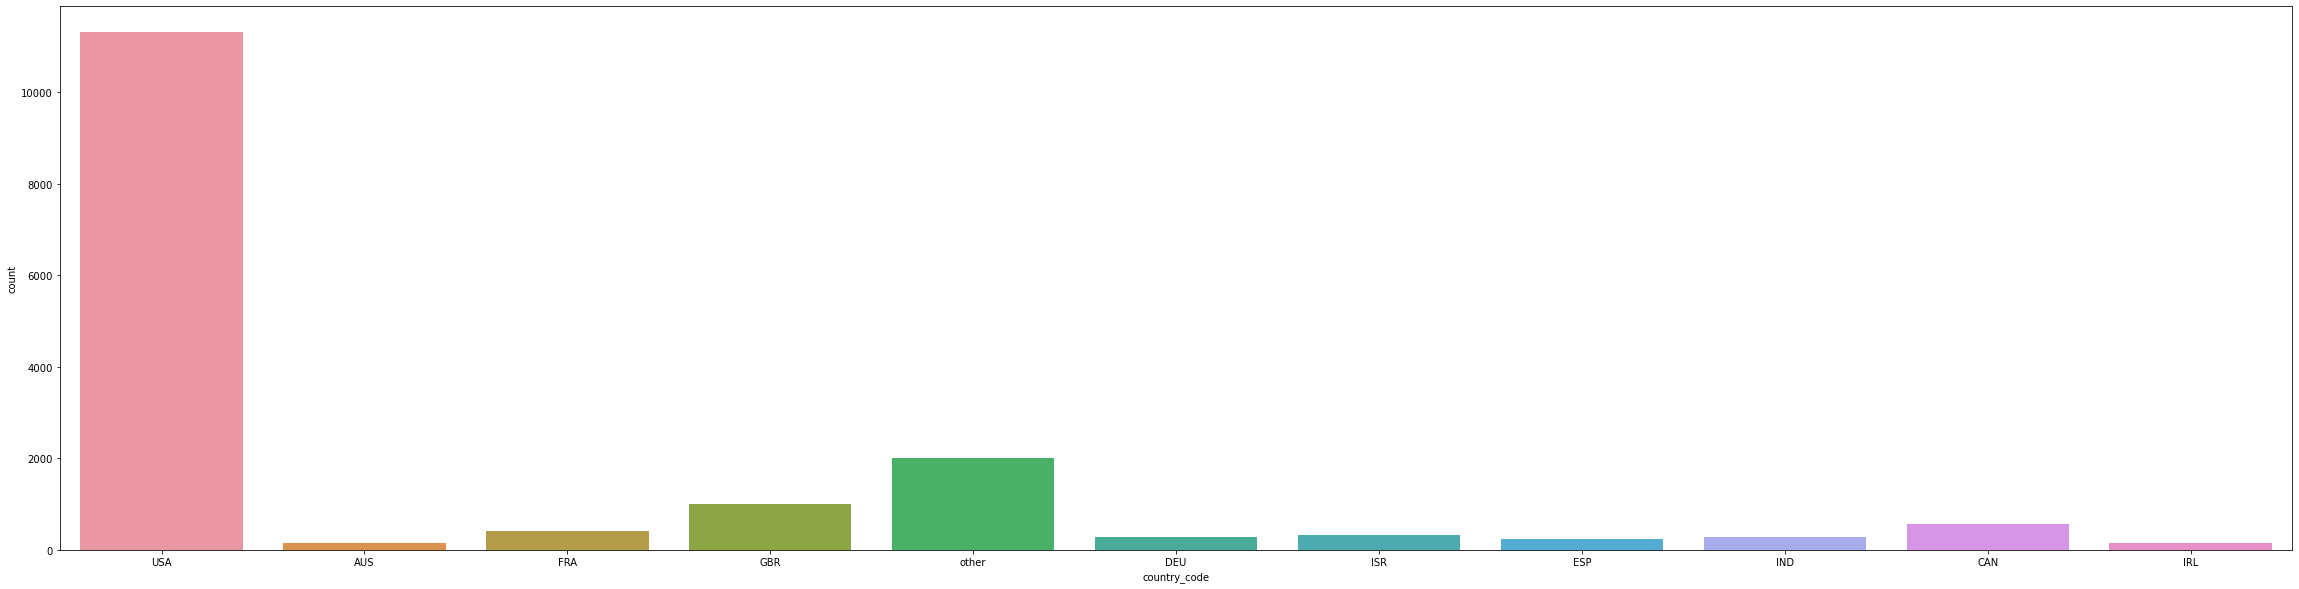

In [25]:
#checking changes using a plot:
plt.figure(figsize=(40,10))
sns.countplot(data=comp, x='country_code')

now we have  15 category and 11 country, the next step is to make one hot encoder for them.

In [26]:
#one hot encoding of nominal variables
one_hot_col=['category_code','country_code']
comp_one_hot=pd.get_dummies(comp[one_hot_col])
#adding the one hot encoded columns to the main columns
comp=pd.concat([comp,comp_one_hot],axis=1)


In [27]:
comp.head()

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_USA,country_code_other
13,web,acquired,2007-10-01,NaT,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,...,0,0,0,0,0,0,0,0,1,0
20,cleantech,operating,2003-01-01,NaT,USA,2011-03-08,2012-01-26,3.0,10125293.0,2010-01-01,...,0,0,0,0,0,0,0,0,1,0
26,mobile,operating,2003-11-01,NaT,AUS,2003-11-01,2003-11-01,1.0,250000.0,2007-11-01,...,0,0,0,0,0,0,0,0,0,0
32,education,operating,2010-10-01,NaT,USA,2011-04-16,2011-04-16,1.0,100000.0,2010-10-01,...,0,0,0,0,0,0,0,0,1,0
36,other,operating,2006-01-01,NaT,USA,2011-09-06,2012-07-10,2.0,11300000.0,NaT,...,0,0,0,0,0,0,0,0,1,0


## Creating new variables

In [28]:
status_open=['operating','ipo']
#creating a new column that return 1 if the company is open and 0 if it is closed or aquired
comp['isopen']=comp['status'].apply(lambda x: 1 if x in status_open else 0)



In [29]:
#making a function that return the number of days for each date
def get_days_since(x) :
    return (2021- x.dt.year)*365

In [30]:
#changing dates into days
dat_col=['founded_at','closed_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at']

for k in dat_col:
     comp[k]=get_days_since(comp[k])

In [31]:
comp.describe()

,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_USA,country_code_other,isopen
count,16715.000000,1064.000000,16664.000000,16664.000000,16715.000000,1.671500e+04,9933.000000,9933.000000,9933.000000,14296.000000,...,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,5134.719115,3480.878759,3912.447792,3692.273764,1.460963,4.328067e+06,3921.260445,3653.086681,1.589953,4.780778,...,0.016512,0.014059,0.024349,0.060544,0.016452,0.008794,0.019144,0.676937,0.120251,0.858869
std,2430.968593,599.387311,923.988050,862.430699,0.675884,5.864319e+06,1091.047461,1017.016175,0.807790,14.167358,...,0.127438,0.117739,0.154136,0.238500,0.127211,0.093368,0.137037,0.467661,0.325265,0.348167
min,2555.000000,2920.000000,2920.000000,2920.000000,1.000000,2.910000e+02,2555.000000,2555.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3650.000000,2920.000000,3285.000000,2920.000000,1.000000,3.788130e+05,3285.000000,2920.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4380.000000,3285.000000,3650.000000,3285.000000,1.000000,1.600000e+06,3650.000000,3285.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,5840.000000,3650.000000,4380.000000,4015.000000,2.000000,6.000000e+06,4380.000000,4015.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,41975.000000,8760.000000,13505.000000,13505.000000,3.000000,2.675000e+07,16425.000000,16425.000000,7.000000,1046.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#making a new column active days
comp['closed_at']=comp['closed_at'].fillna(0)

comp['active_days']=comp['founded_at']-comp['closed_at']
#making sure that it doesn't contain negative values( some colsed dates in raw data are not logical they preceed the foundation date)
comp=comp.loc[comp['active_days']>0,:]

In [33]:
#removing closed_at column
comp=comp.drop(['closed_at'],axis=1)
#Renaming_Columns
comp.rename(
    columns={"founded_at": "founded_since", "first_funding_at": "first_funding_since", "last_funding_at": "last_funding_since",
            "first_milestone_at": "first_milestone_since","last_milestone_at":"last_milestone_since"},
    inplace=True,
)

## Handling missing values


In [34]:

print("remaining null values","\n",comp.isnull().sum().sort_values(),"\n\n")

#handling missing values of lat,lng and relationships using mean
mean_col=['relationships','milestones']
for y in mean_col:
          comp[y]=comp[y].fillna(comp[y].mean())


#handling missing values of first_funding_since,last_funding_since and last_milestone_since and first_milestone_since using mode
mode_coll=['first_funding_since','last_funding_since','last_milestone_since','first_milestone_since']
for z in mode_coll:
      comp[z]=comp[z].fillna(comp[z].mode()[0])

#checking
print("checking","\n",comp[mean_col].isnull().sum(),comp[mode_coll].isnull().sum())

remaining null values 
 category_code                   0
category_code_mobile            0
category_code_other             0
category_code_social            0
category_code_software          0
category_code_web               0
country_code_AUS                0
country_code_CAN                0
category_code_health            0
country_code_DEU                0
country_code_FRA                0
country_code_GBR                0
country_code_IND                0
country_code_IRL                0
country_code_ISR                0
country_code_USA                0
country_code_other              0
country_code_ESP                0
category_code_hardware          0
category_code_games_video       0
category_code_enterprise        0
status                          0
founded_since                   0
country_code                    0
funding_rounds                  0
funding_total_usd               0
isopen                          0
active_days                     0
category_code_advertisin

In [35]:
#converting float to the nearst integer

comp[['milestones','relationships']] =comp[['milestones','relationships']].apply(lambda x: round(x, 0))


In [36]:
#saving the csv file  with categorical columns
comp.to_csv("Companies_preprocessed.csv")

In [37]:
#Final_look
comp.head()

,category_code,status,founded_since,country_code,first_funding_since,last_funding_since,funding_rounds,funding_total_usd,first_milestone_since,last_milestone_since,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_USA,country_code_other,isopen,active_days
13,web,acquired,5110,USA,4745.0,4745.0,1.0,5000000.0,4745.0,3285.0,...,0,0,0,0,0,0,1,0,0,5110.0
20,cleantech,operating,6570,USA,3650.0,3285.0,3.0,10125293.0,4015.0,4015.0,...,0,0,0,0,0,0,1,0,1,6570.0
26,mobile,operating,6570,AUS,6570.0,6570.0,1.0,250000.0,5110.0,5110.0,...,0,0,0,0,0,0,0,0,1,6570.0
32,education,operating,4015,USA,3650.0,3650.0,1.0,100000.0,4015.0,4015.0,...,0,0,0,0,0,0,1,0,1,4015.0
36,other,operating,5475,USA,3650.0,3285.0,2.0,11300000.0,3285.0,2920.0,...,0,0,0,0,0,0,1,0,1,5475.0


In [38]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16683 entries, 13 to 196552
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category_code              16683 non-null  object 
 1   status                     16683 non-null  object 
 2   founded_since              16683 non-null  int64  
 3   country_code               16683 non-null  object 
 4   first_funding_since        16683 non-null  float64
 5   last_funding_since         16683 non-null  float64
 6   funding_rounds             16683 non-null  float64
 7   funding_total_usd          16683 non-null  float64
 8   first_milestone_since      16683 non-null  float64
 9   last_milestone_since       16683 non-null  float64
 10  milestones                 16683 non-null  float64
 11  relationships              16683 non-null  float64
 12  category_code_advertising  16683 non-null  uint8  
 13  category_code_analytics    16683 non-null  u

In [39]:

#reading the preprocessed data
comp_data=pd.read_csv('Companies_preprocessed.csv')

# Exploratory Data Analysis


## Univirate Analysis

<AxesSubplot:xlabel='status', ylabel='count'>

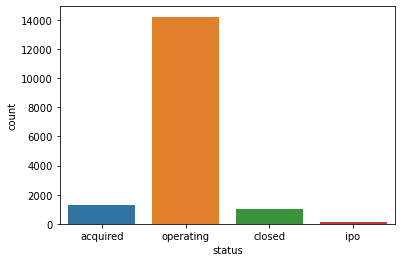

In [40]:
# for the status column we will use countplot
sns.countplot(data=comp_data, x='status')

* This shows that the dataset is biased as most of the companies are operating.

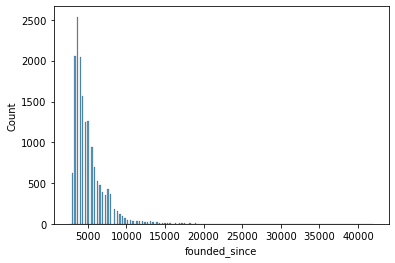

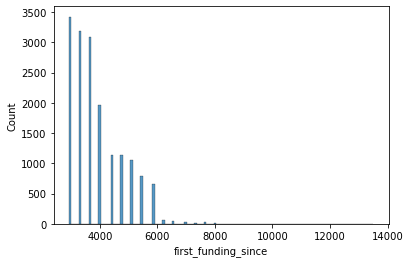

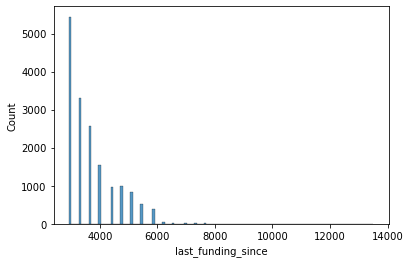

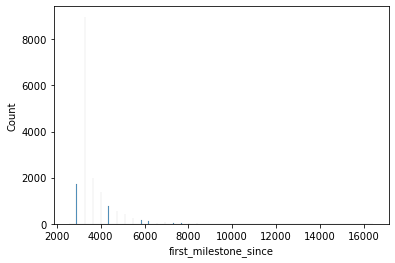

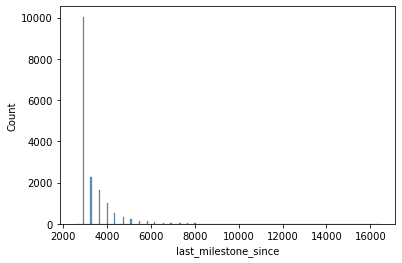

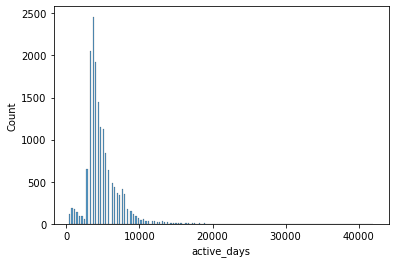

In [41]:
#for all the time related columns we will use histplot
days_col=['founded_since','first_funding_since','last_funding_since','first_milestone_since',
         'last_milestone_since','active_days']

for i in days_col:
        plt.figure()
        sns.histplot(data=comp_data,x=i)

Studying these figures we conclude that:
* Most of the companies are founded since less than 5000 days.
* Most of companies First and last fundings was since less 6000 days (this means that most of the funding rounds was 1)
* the maximum count number of companies active days is around 5000 days

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

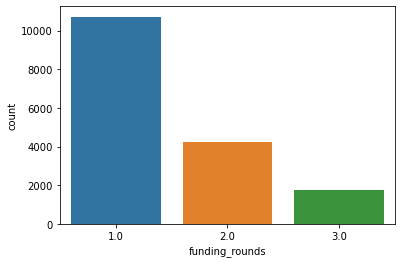

In [42]:
# for the funding_rounds column we will use countplot
sns.countplot(data=comp_data,x='funding_rounds')


* As stated before most of the companies funding rounds is 1 round only.

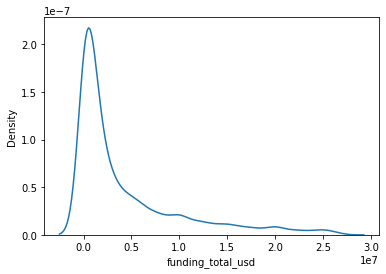

In [43]:
# for the funding_total_usd,lat,lng column we will use denisty plot distribution
num_col=['funding_total_usd']
for i in num_col:
        plt.figure()
        sns.kdeplot(data=comp_data,x=i)

Checking these distributions it was found that:
* Most of the fundings was less that 5 million dollars


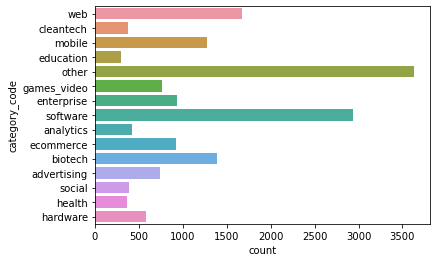

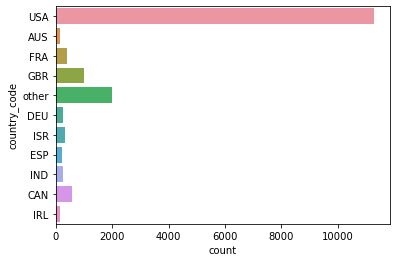

In [44]:
# for the category_code and country_code column we will use countplot

cat_col=['category_code','country_code']
for i in cat_col:
        plt.figure()
        sns.countplot(data=comp_data,y=i)

* most companies are software or web categories
* most companies are from USA

<AxesSubplot:xlabel='milestones', ylabel='count'>

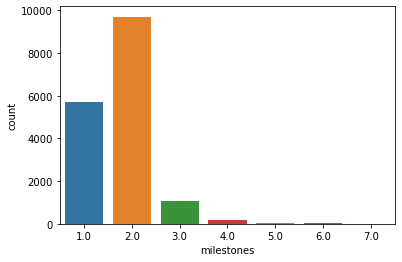

In [45]:
# for the milestones column we will use countplot

sns.countplot(data=comp_data,x='milestones')

* The maximum milestones are 2

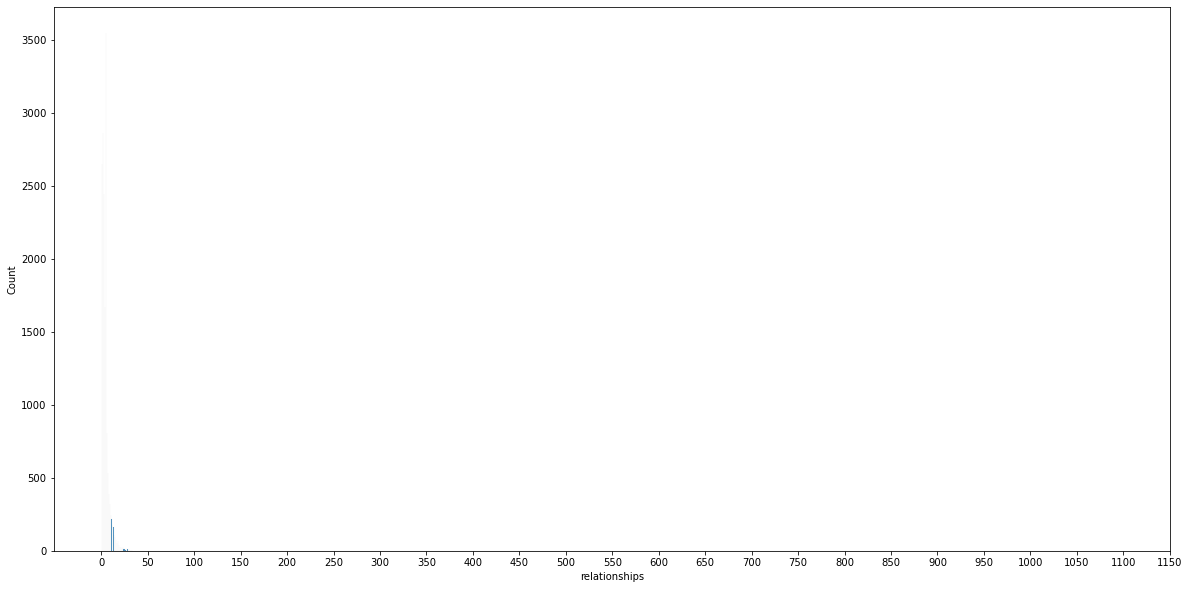

In [46]:
# for the relationships column we will use countplot

plt.figure(figsize=(20,10))
sns.histplot(data=comp_data,x='relationships')
# relationships has values that reach 1200 (few numbers) so to visualize it better we adjust ticking
plt.xticks(np.arange(0,1200,step=50));

* This distribution shows that most of the relationships are less than 50 .

# Bivirate Analysis


<AxesSubplot:>

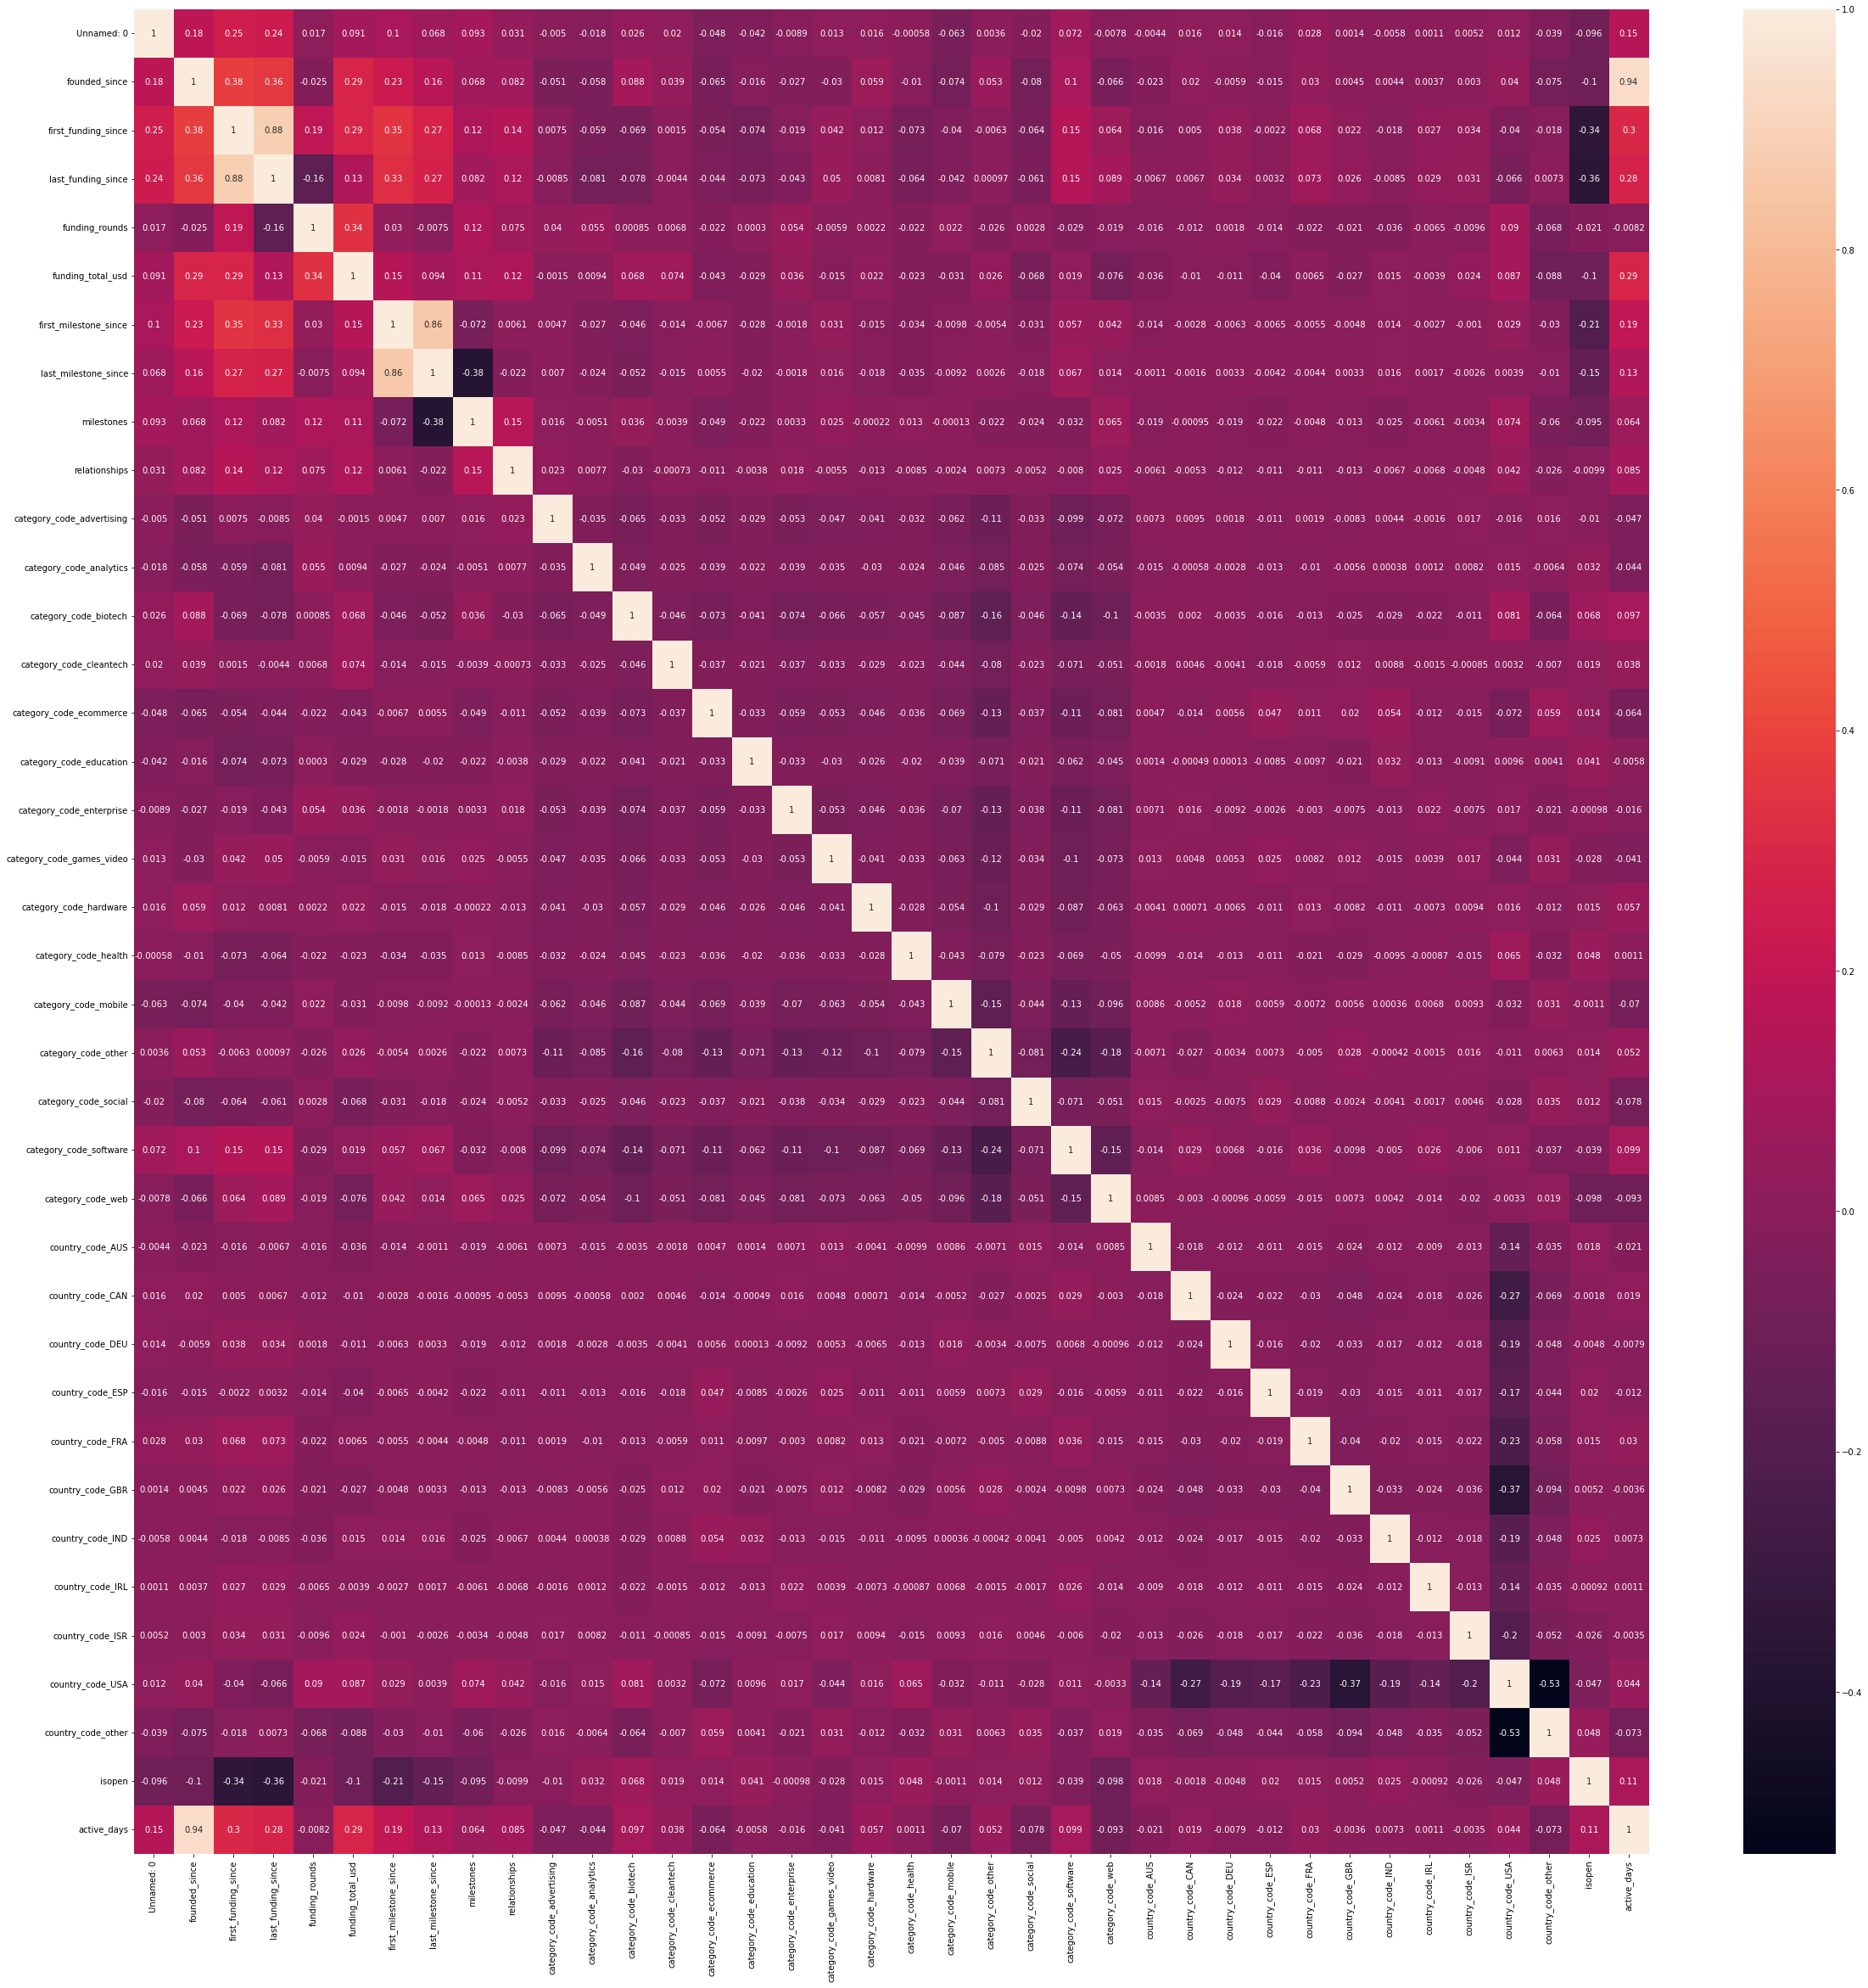

In [47]:
#Finding correlation heatmap
corr=comp_data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)

This graph show the correlation between each attribute, we are intersted in the isopen (status) attribute, from this map we see that isopen column has negative correlation with most of the other columns except for (lng,active_days, some category types and some countries)

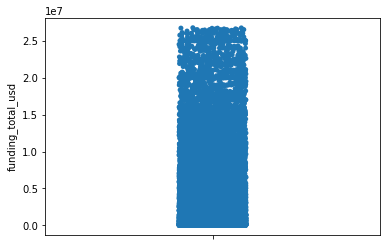

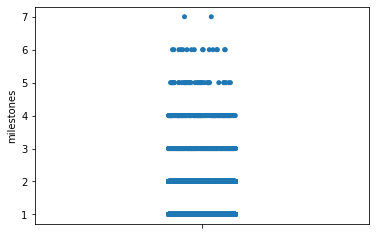

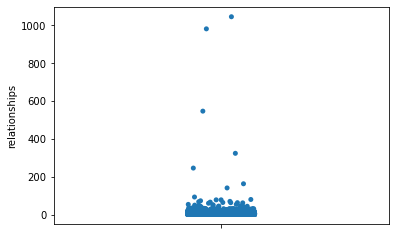

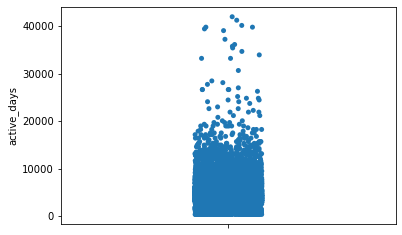

In [48]:
#getting Relation between Status (isopen) column and other columns using different types of plots.
strip_col=['funding_total_usd','milestones','relationships','active_days']
for i in strip_col:
    plt.figure()
    sns.stripplot(data=comp_data, y=i , hue='status')

<AxesSubplot:xlabel='country_code'>

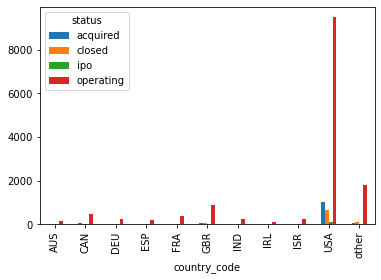

In [49]:
ct = pd.crosstab(comp_data['country_code'],comp_data['status'])
ct.plot(kind='bar', stacked=False)

from these plots we can deduce that:
* most of the aquired companies are form USA
* most of the aquired companies are Software companies

# Feature Engineering
previously in this note book we have done few steps that can be identified as feature engineering but now we will complete the process.

### Feature Creation

we already created new columns isopen from status feature and column active_days from Founded_since and closed_at columns
now we will try to create new columns that can be useful in our analysis.

In [50]:
# introducing new column Funding_per_round
comp['funding_per_round']=comp['funding_total_usd']/comp['funding_rounds']
# introducing new column Funding_per_active_days
comp['funding_per_ative_days']=comp['funding_total_usd']/comp['active_days']
# introducing new column days_between_milestones
comp['days_between_milestones']=comp['first_milestone_since'] - comp['last_milestone_since']
# introducing new column days_for_first_milestone
comp['days_for_first_milestone']= comp['founded_since']-comp['first_milestone_since']



comp.head()

,category_code,status,founded_since,country_code,first_funding_since,last_funding_since,funding_rounds,funding_total_usd,first_milestone_since,last_milestone_since,...,country_code_IRL,country_code_ISR,country_code_USA,country_code_other,isopen,active_days,funding_per_round,funding_per_ative_days,days_between_milestones,days_for_first_milestone
13,web,acquired,5110,USA,4745.0,4745.0,1.0,5000000.0,4745.0,3285.0,...,0,0,1,0,0,5110.0,5.000000e+06,978.473581,1460.0,365.0
20,cleantech,operating,6570,USA,3650.0,3285.0,3.0,10125293.0,4015.0,4015.0,...,0,0,1,0,1,6570.0,3.375098e+06,1541.140487,0.0,2555.0
26,mobile,operating,6570,AUS,6570.0,6570.0,1.0,250000.0,5110.0,5110.0,...,0,0,0,0,1,6570.0,2.500000e+05,38.051750,0.0,1460.0
32,education,operating,4015,USA,3650.0,3650.0,1.0,100000.0,4015.0,4015.0,...,0,0,1,0,1,4015.0,1.000000e+05,24.906600,0.0,0.0
36,other,operating,5475,USA,3650.0,3285.0,2.0,11300000.0,3285.0,2920.0,...,0,0,1,0,1,5475.0,5.650000e+06,2063.926941,365.0,2190.0


### Feature Transformation

we already done some date parsing for some date features and one hot encoding for categorical features, checking the funding_total_usd feature using a box plot it was found that some outliers still remains, to solve this problem we will scale this feature using robust scaler technique:

In [51]:
#if we look at funding_total_usd feature using a box plot we see that its still have some outliers
#applying robust scaler technique
comp['funding_total_usd_robust']=(comp['funding_total_usd']-comp['funding_total_usd'].median())/(comp['funding_total_usd'].quantile(0.75)-comp['funding_total_usd'].quantile(0.25))




comp.head()


,category_code,status,founded_since,country_code,first_funding_since,last_funding_since,funding_rounds,funding_total_usd,first_milestone_since,last_milestone_since,...,country_code_ISR,country_code_USA,country_code_other,isopen,active_days,funding_per_round,funding_per_ative_days,days_between_milestones,days_for_first_milestone,funding_total_usd_robust
13,web,acquired,5110,USA,4745.0,4745.0,1.0,5000000.0,4745.0,3285.0,...,0,1,0,0,5110.0,5.000000e+06,978.473581,1460.0,365.0,0.605417
20,cleantech,operating,6570,USA,3650.0,3285.0,3.0,10125293.0,4015.0,4015.0,...,0,1,0,1,6570.0,3.375098e+06,1541.140487,0.0,2555.0,1.518046
26,mobile,operating,6570,AUS,6570.0,6570.0,1.0,250000.0,5110.0,5110.0,...,0,0,0,1,6570.0,2.500000e+05,38.051750,0.0,1460.0,-0.240386
32,education,operating,4015,USA,3650.0,3650.0,1.0,100000.0,4015.0,4015.0,...,0,1,0,1,4015.0,1.000000e+05,24.906600,0.0,0.0,-0.267096
36,other,operating,5475,USA,3650.0,3285.0,2.0,11300000.0,3285.0,2920.0,...,0,1,0,1,5475.0,5.650000e+06,2063.926941,365.0,2190.0,1.727219


### Feature Selection

In [52]:
from sklearn.feature_selection import mutual_info_regression
# making copies of the data set to prepare it for label encoding
X = comp.copy()
y = X.pop("isopen")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:]  # show features with their MI scores

status                       0.402047
active_days                  0.119251
last_funding_since           0.074910
first_funding_since          0.070216
funding_per_ative_days       0.031828
first_milestone_since        0.030149
founded_since                0.025742
category_code                0.017799
funding_rounds               0.015616
funding_total_usd_robust     0.012876
last_milestone_since         0.012821
country_code_ESP             0.010996
country_code_AUS             0.010043
funding_per_round            0.009845
funding_total_usd            0.009517
country_code_FRA             0.008040
category_code_hardware       0.007873
country_code_IND             0.007822
category_code_web            0.007661
country_code_CAN             0.006762
category_code_software       0.006399
days_for_first_milestone     0.006264
milestones                   0.004992
country_code_DEU             0.004591
country_code_other           0.004280
category_code_cleantech      0.002860
category_cod

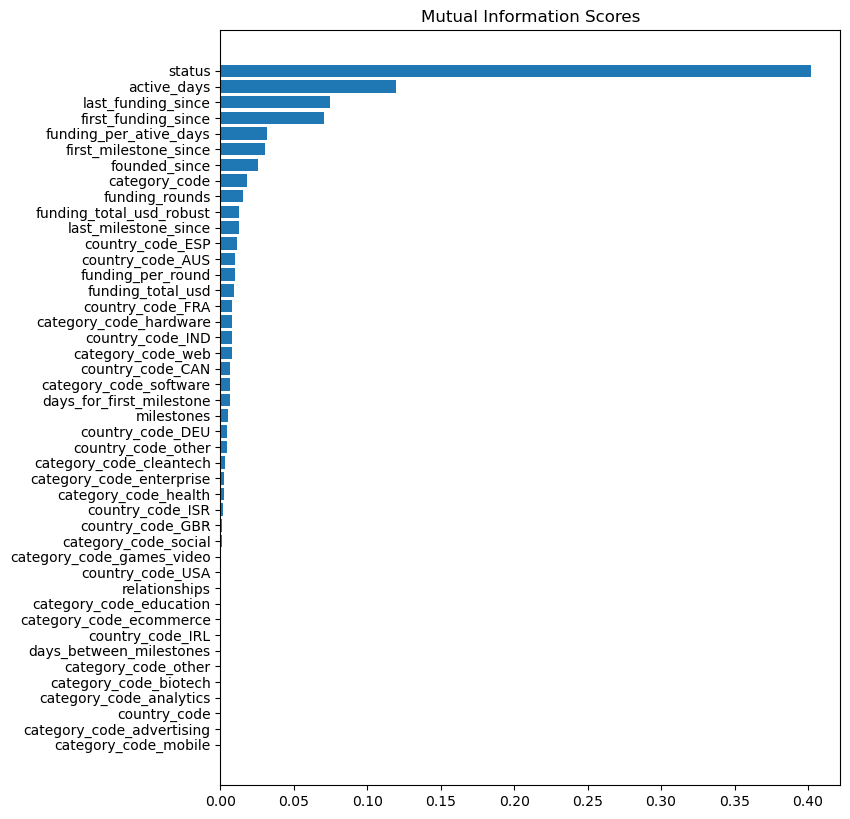

In [53]:
#making a plot to show these ML results
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

looking at the previous graph we figure that some features have zero relation with our target feature which is "isopen", so its more relevent to drop them to reduce the size of our dataset.

In [54]:
# dropping irrelevent columns
comp=comp.drop(['country_code',
       'country_code_GBR', 'country_code_ESP', 'category_code_advertising',
       'category_code_social', 'category_code_other',
       'category_code_enterprise', 'funding_rounds', 'category_code_health',
       'country_code_FRA'],axis=1)
#dropping categroical columns remaining
comp=comp.drop(['category_code','status'],axis=1)



In [55]:
#final look
comp.head()


,founded_since,first_funding_since,last_funding_since,funding_total_usd,first_milestone_since,last_milestone_since,milestones,relationships,category_code_analytics,category_code_biotech,...,country_code_ISR,country_code_USA,country_code_other,isopen,active_days,funding_per_round,funding_per_ative_days,days_between_milestones,days_for_first_milestone,funding_total_usd_robust
13,5110,4745.0,4745.0,5000000.0,4745.0,3285.0,3.0,14.0,0,0,...,0,1,0,0,5110.0,5.000000e+06,978.473581,1460.0,365.0,0.605417
20,6570,3650.0,3285.0,10125293.0,4015.0,4015.0,1.0,6.0,0,0,...,0,1,0,1,6570.0,3.375098e+06,1541.140487,0.0,2555.0,1.518046
26,6570,6570.0,6570.0,250000.0,5110.0,5110.0,1.0,2.0,0,0,...,0,0,0,1,6570.0,2.500000e+05,38.051750,0.0,1460.0,-0.240386
32,4015,3650.0,3650.0,100000.0,4015.0,4015.0,1.0,5.0,0,0,...,0,1,0,1,4015.0,1.000000e+05,24.906600,0.0,0.0,-0.267096
36,5475,3650.0,3285.0,11300000.0,3285.0,2920.0,2.0,2.0,0,0,...,0,1,0,1,5475.0,5.650000e+06,2063.926941,365.0,2190.0,1.727219


In [56]:
comp.info()
comp.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16683 entries, 13 to 196552
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   founded_since              16683 non-null  int64  
 1   first_funding_since        16683 non-null  float64
 2   last_funding_since         16683 non-null  float64
 3   funding_total_usd          16683 non-null  float64
 4   first_milestone_since      16683 non-null  float64
 5   last_milestone_since       16683 non-null  float64
 6   milestones                 16683 non-null  float64
 7   relationships              16683 non-null  float64
 8   category_code_analytics    16683 non-null  uint8  
 9   category_code_biotech      16683 non-null  uint8  
 10  category_code_cleantech    16683 non-null  uint8  
 11  category_code_ecommerce    16683 non-null  uint8  
 12  category_code_education    16683 non-null  uint8  
 13  category_code_games_video  16683 non-null  u

,founded_since,first_funding_since,last_funding_since,funding_total_usd,first_milestone_since,last_milestone_since,milestones,relationships,category_code_analytics,category_code_biotech,...,country_code_ISR,country_code_USA,country_code_other,isopen,active_days,funding_per_round,funding_per_ative_days,days_between_milestones,days_for_first_milestone,funding_total_usd_robust
count,16683.000000,16683.000000,16683.000000,1.668300e+04,16683.000000,16683.000000,16683.000000,16683.000000,16683.000000,16683.000000,...,16683.000000,16683.000000,16683.000000,16683.000000,16683.000000,1.668300e+04,16683.000000,16683.000000,16683.000000,16683.000000
mean,5136.866870,3909.085896,3689.162621,4.332168e+06,3663.455314,3355.886531,1.756399,4.815501,0.025175,0.083498,...,0.019181,0.676917,0.120122,0.860517,4923.397770,2.967452e+06,889.715900,307.568783,1473.411557,0.486500
std,2432.429615,924.195370,861.899917,5.864379e+06,897.720040,863.125916,0.654772,13.114425,0.156662,0.276642,...,0.137166,0.467668,0.325114,0.346461,2557.631485,4.186767e+06,1313.372393,466.773990,2392.905233,1.044234
min,2555.000000,2920.000000,2920.000000,2.910000e+02,2555.000000,2555.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,365.000000,2.910000e+02,0.066438,0.000000,-13140.000000,-0.284850
25%,3650.000000,3285.000000,2920.000000,3.840350e+05,3285.000000,2920.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,3650.000000,3.000000e+05,92.900631,0.000000,0.000000,-0.216519
50%,4380.000000,3650.000000,3285.000000,1.600000e+06,3285.000000,2920.000000,2.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,4380.000000,1.200000e+06,372.602740,365.000000,730.000000,0.000000
75%,5840.000000,4380.000000,4015.000000,6.000000e+06,3650.000000,3650.000000,2.000000,5.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,5840.000000,4.000000e+06,1167.332029,365.000000,2190.000000,0.783481
max,41975.000000,13505.000000,13505.000000,2.675000e+07,16425.000000,16425.000000,7.000000,1046.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,41975.000000,2.672846e+07,27397.260274,10220.000000,38690.000000,4.478304


lookin at the minimum value of days_for_first_milestone we find that it has value that is less that zero so this means that some
rows has data that is not logical so we will drop them.


In [57]:
#making sure that it doesn't contain negative values( some colsed dates in raw data are not logical they preceed the foundation date)
comp=comp.loc[comp['days_for_first_milestone']>=0,:]
#checking
comp.describe()

,founded_since,first_funding_since,last_funding_since,funding_total_usd,first_milestone_since,last_milestone_since,milestones,relationships,category_code_analytics,category_code_biotech,...,country_code_ISR,country_code_USA,country_code_other,isopen,active_days,funding_per_round,funding_per_ative_days,days_between_milestones,days_for_first_milestone,funding_total_usd_robust
count,16012.000000,16012.000000,16012.000000,1.601200e+04,16012.000000,16012.000000,16012.000000,16012.000000,16012.000000,16012.000000,...,16012.000000,16012.000000,16012.000000,16012.000000,16012.000000,1.601200e+04,16012.000000,16012.000000,16012.000000,16012.000000
mean,5195.186423,3926.075131,3701.927929,4.393608e+06,3619.636523,3324.983138,1.756870,4.866475,0.025356,0.084749,...,0.019423,0.678741,0.118286,0.858731,4978.926430,3.003755e+06,892.944165,294.653385,1575.549900,0.497440
std,2455.427163,926.040476,866.288640,5.892179e+06,776.362313,761.847004,0.651432,13.369261,0.157209,0.278516,...,0.138010,0.466975,0.322957,0.348310,2584.833198,4.200001e+06,1303.978193,405.910010,2367.598056,1.049184
min,2920.000000,2920.000000,2920.000000,2.910000e+02,2555.000000,2555.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,365.000000,2.910000e+02,0.066438,0.000000,0.000000,-0.284850
25%,3650.000000,3285.000000,2920.000000,4.000000e+05,3285.000000,2920.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,3650.000000,3.000000e+05,97.847358,0.000000,365.000000,-0.213677
50%,4380.000000,3650.000000,3285.000000,1.662713e+06,3285.000000,2920.000000,2.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,4380.000000,1.230667e+06,380.517504,365.000000,730.000000,0.011167
75%,5840.000000,4380.000000,4015.000000,6.000000e+06,3650.000000,3650.000000,2.000000,5.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,5840.000000,4.000000e+06,1178.082192,365.000000,2190.000000,0.783481
max,41975.000000,13505.000000,13505.000000,2.675000e+07,12775.000000,12410.000000,7.000000,1046.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,41975.000000,2.672846e+07,27397.260274,9855.000000,38690.000000,4.478304


In [58]:
#saving the csv file
comp.to_csv("Companies_cleaned.csv")

# Machine Learning models
## Logistic Regression


In [59]:
# splitting the data into train,test,validation by ratio 60/20/20
X = comp.drop("isopen", axis = 1)
Y =comp["isopen"]
# Split the data into training and test sets first (80/20 split)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=42)

# Split the training data further into training and validation sets (60/20 split)
X_train_data, X_val = train_test_split(X, test_size=0.25, random_state=42)
Y_train_data, Y_val = train_test_split(Y, test_size=0.25, random_state=42)


In [60]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
import sklearn

from sklearn.metrics import confusion_matrix

print("Accuracy of the model =",sklearn.metrics.accuracy_score(Y_test,Y_pred))


Accuracy of the model = 0.9160162347798938


<AxesSubplot:>

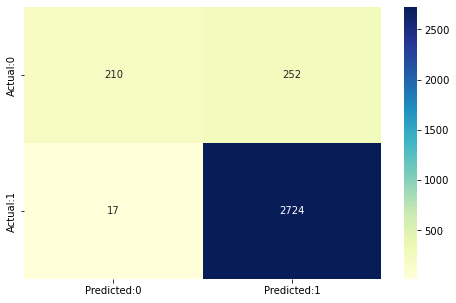

In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 210+2724 = 2934 correct predictions and 17+252= 269 incorrect ones.

* True Positives: 2724

* True Negatives: 210

* False Positives: 17 

* False Negatives: 252

In [63]:
#writing classification Report
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.45      0.61       462
           1       0.92      0.99      0.95      2741

    accuracy                           0.92      3203
   macro avg       0.92      0.72      0.78      3203
weighted avg       0.92      0.92      0.90      3203



#### Validation of the model

we will now apply the model on validation data

In [64]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:

import sklearn

from sklearn.metrics import confusion_matrix

print("Accuracy of the model =",sklearn.metrics.accuracy_score(Y_val,Y_pred))


Accuracy of the model = 0.9160629527854109


<AxesSubplot:>

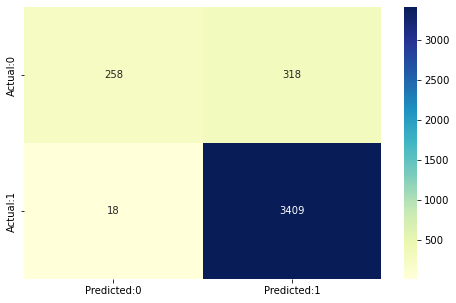

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_val,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 258+3409 = 3667 correct predictions and 18+318= 336 incorrect ones.

* True Positives: 3409

* True Negatives: 258

* False Positives: 18 

* False Negatives: 318

In [67]:
#writing classification Report

print(classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.45      0.61       576
           1       0.91      0.99      0.95      3427

    accuracy                           0.92      4003
   macro avg       0.92      0.72      0.78      4003
weighted avg       0.92      0.92      0.90      4003



# Naive Bayes Classifier


In [68]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [69]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [70]:
#checkin accuracy of model
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8105


In [71]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, Y_test)))

Training set score: 0.8123
Test set score: 0.8105


the two values are comparable so there is no signs of over fitting or under fitting.

In [72]:
#chceking confusion matrix
cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 194  268]
 [ 339 2402]]

True Positives(TP) =  194

True Negatives(TN) =  2402

False Positives(FP) =  268

False Negatives(FN) =  339


The confusion matrix shows 194+2402 = 2596 correct predictions and 268+339= 607 incorrect ones.


<AxesSubplot:>

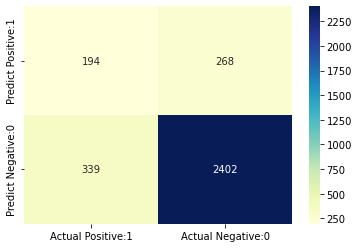

In [73]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [74]:
#writing classification Report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.42      0.39       462
           1       0.90      0.88      0.89      2741

    accuracy                           0.81      3203
   macro avg       0.63      0.65      0.64      3203
weighted avg       0.82      0.81      0.82      3203



#### Validation of the model

we will now apply the model on validation data

In [75]:
y_pred = gnb.predict(X_val)

y_pred


array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [76]:
#checkin accuracy of model
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_val, y_pred)))

Model accuracy score: 0.8124


In [77]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_val, Y_val)))



Training set score: 0.8123
Test set score: 0.8124


the two values are comparable so there is no signs of over fitting or under fitting.

In [78]:
#chceking confusion matrix
cm = confusion_matrix(Y_val, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 246  330]
 [ 421 3006]]

True Positives(TP) =  246

True Negatives(TN) =  3006

False Positives(FP) =  330

False Negatives(FN) =  421


The confusion matrix shows 246+3006 = 3252 correct predictions and 421+330= 751 incorrect ones.


<AxesSubplot:>

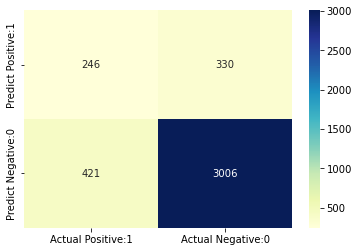

In [79]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [80]:
#writing classification Report

print(classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.43      0.40       576
           1       0.90      0.88      0.89      3427

    accuracy                           0.81      4003
   macro avg       0.63      0.65      0.64      4003
weighted avg       0.82      0.81      0.82      4003



## k-nearest neighbor

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
KN = KNeighborsClassifier()
KN.fit(X_train, Y_train)

KNeighborsClassifier()

In [83]:
y_pred = KN.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [84]:
#checkin accuracy of model

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8754


In [85]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(KN.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(KN.score(X_test, Y_test)))

Training set score: 0.8982
Test set score: 0.8754


In [86]:
#chceking confusion matrix
cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 118  344]
 [  55 2686]]

True Positives(TP) =  118

True Negatives(TN) =  2686

False Positives(FP) =  344

False Negatives(FN) =  55


<AxesSubplot:>

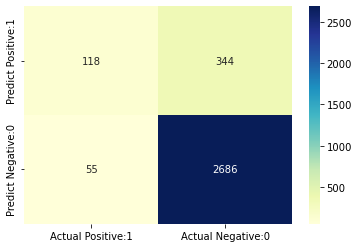

In [87]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [88]:
#writing classification Report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.26      0.37       462
           1       0.89      0.98      0.93      2741

    accuracy                           0.88      3203
   macro avg       0.78      0.62      0.65      3203
weighted avg       0.86      0.88      0.85      3203



## Neural network

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [90]:
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the model
mlp.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9069622229160162


In [91]:
# Calculate F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.9465374955148906
Confusion Matrix:
[[ 267  195]
 [ 103 2638]]


<AxesSubplot:>

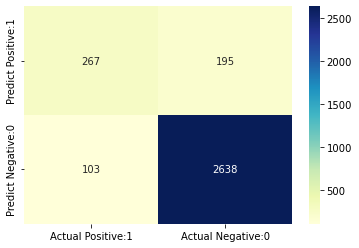

In [92]:
# visualization Result

cm_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [93]:
#writing classification Report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       462
           1       0.93      0.96      0.95      2741

    accuracy                           0.91      3203
   macro avg       0.83      0.77      0.79      3203
weighted avg       0.90      0.91      0.90      3203



### Validation of the Neural Network model
  -  we will now apply the model on validation data

In [94]:
# Create a MLP classifier object
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)  # Set the hidden layer sizes and maximum number of iterations

# Train the classifier
mlp.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred = mlp.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(Y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(Y_val, y_pred)
print("F1 Score:", f1)

# Generate confusion matrix
com_matrix = confusion_matrix(Y_val, y_pred)
print("Confusion Matrix:")
print(com_matrix)

Accuracy: 0.6824881338995753
F1 Score: 0.7895346911740354
Confusion Matrix:
[[ 348  228]
 [1043 2384]]


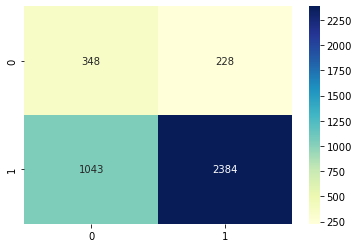

In [95]:
con_matrix = sns.heatmap(com_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [96]:
#writing classification Report

print(classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.60      0.35       576
           1       0.91      0.70      0.79      3427

    accuracy                           0.68      4003
   macro avg       0.58      0.65      0.57      4003
weighted avg       0.82      0.68      0.73      4003



In [97]:
model_acc = {
    'Model': ['Logistic regression', 'Naive Bayes', 'K-Nearest Neighbors','Neural Network'],
    'Accuracy': [0.92, 0.81, 0.85, 0.88] }
    
model_acc=pd.DataFrame(model_acc)
model_acc.head()

,Model,Accuracy
0,Logistic regression,0.92
1,Naive Bayes,0.81
2,K-Nearest Neighbors,0.85
3,Neural Network,0.88


## Creating a ML pipeline Model

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [99]:
pipe_logisticR = Pipeline([("scaler1", StandardScaler()),
                            ("pca1", PCA(n_components=2)),
                            ("LR_regression", LogisticRegression())])

In [100]:
model_LG = pipe_logisticR.fit(X_train,Y_train)
pred = model_LG.predict(X_test)
score = accuracy_score(Y_test, pred)
print(f"Accuracy score for logisticRegression is {score}.")

Accuracy score for logisticRegression is 0.8532625663440524.


In [101]:
pipe_KNeighbors = Pipeline([("scaler2", StandardScaler()),
                            ("pca2", PCA(n_components=2)),
                            ("kNN_classifier", KNeighborsClassifier(n_neighbors=11))])

In [102]:
model_Kn = pipe_KNeighbors.fit(X_train,Y_train)
pred = pipe_KNeighbors.predict(X_test)
score = accuracy_score(Y_test, pred)
print(f"Accuracy score for KNN is {score}.")

Accuracy score for KNN is 0.8488916640649391.


#### Saving the models

In [103]:
import pickle

pickle.dump(model_LG, open('Lg.pkl', 'wb'))
pickle.dump(model_Kn, open('Kn.pkl', 'wb'))

## Deployment

In [104]:
# Load your models

model_LG = pickle.load(open('Lg.pkl', 'rb'))
model_Kn = pickle.load(open('Kn.pkl', 'rb'))

In [105]:
# Define a Streamlit app
import streamlit as st

def predict(input_data):
    prediction_ensemble = model_ensemble.predict([input_data])[0]
    prediction_LG = model_LG.predict([input_data])[0]
    prediction_Kn = model_Kn.predict([input_data])[0]
    return {
        'prediction_LG': prediction_LG,
        'prediction_Kn': prediction_Kn
        
    }

def main():
    st.title('Machine Learning Model Prediction')
    st.write('Enter input data:')
    input1 = st.number_input('Input 1')
    input2 = st.number_input('Input 2')
    input_data = [input1, input2]
    if st.button('Predict'):
        output = predict(input_data)
        st.write('Prediction results:')
        st.write(output)

if __name__ == '__main__':
    main()

2023-05-31 12:27:26.706 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
